In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [5]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

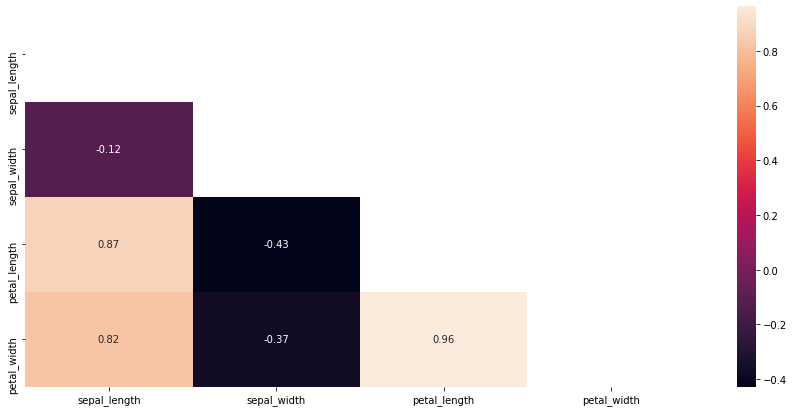

In [6]:
x = np.triu(df.corr())
plt.figure(figsize=(15,7))
sns.heatmap(data= df.corr(), mask=x, annot=True)
plt.show()

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

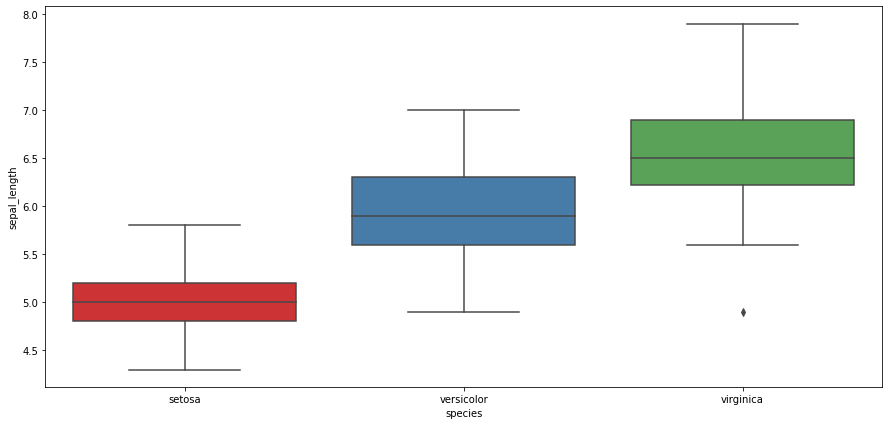

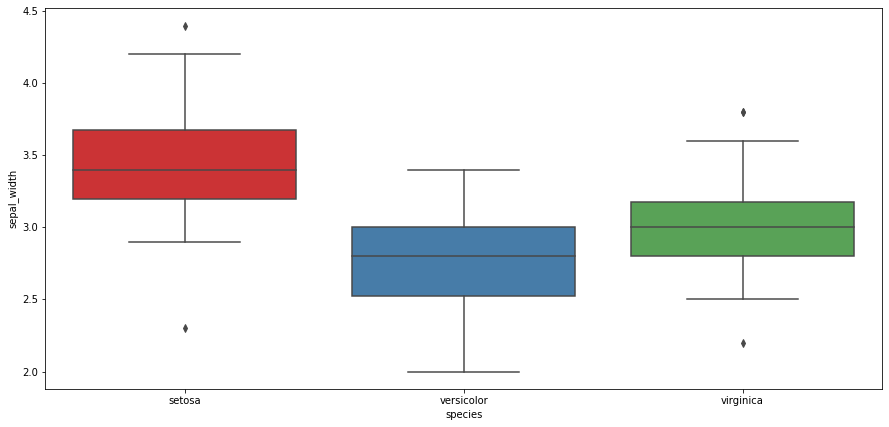

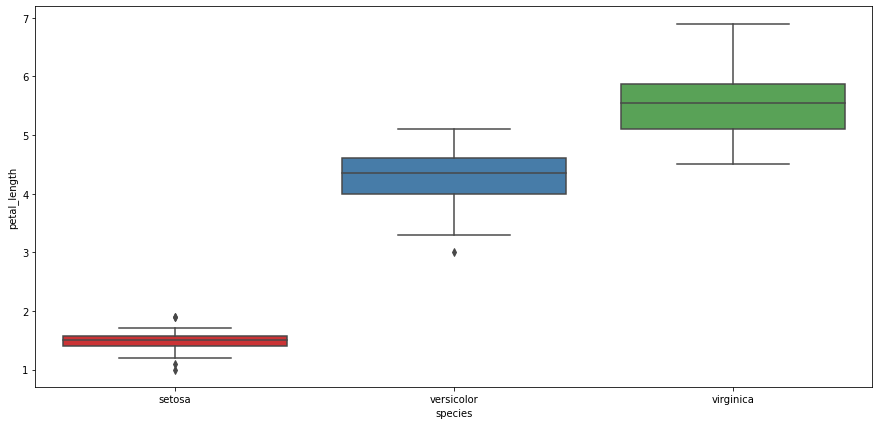

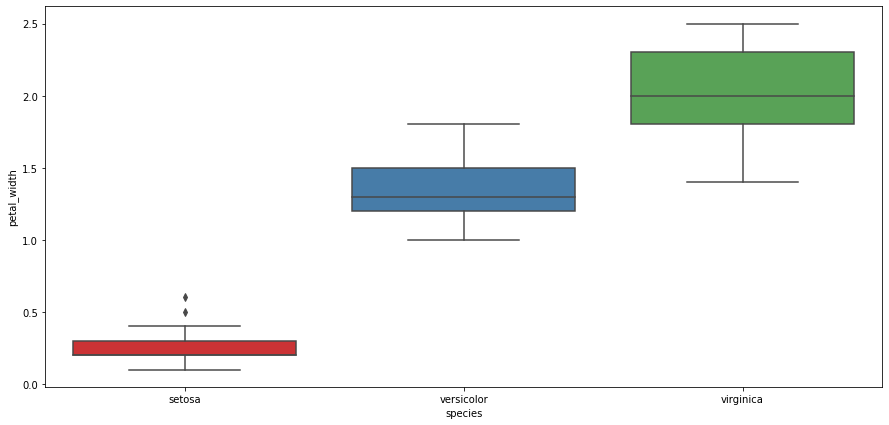

In [9]:
sns.set_palette('Set1')
for i in ['sepal_length','sepal_width','petal_length','petal_width']:
    plt.figure(figsize=(15,7))
    sns.boxplot(data=df, y=i, x='species')
    plt.show()

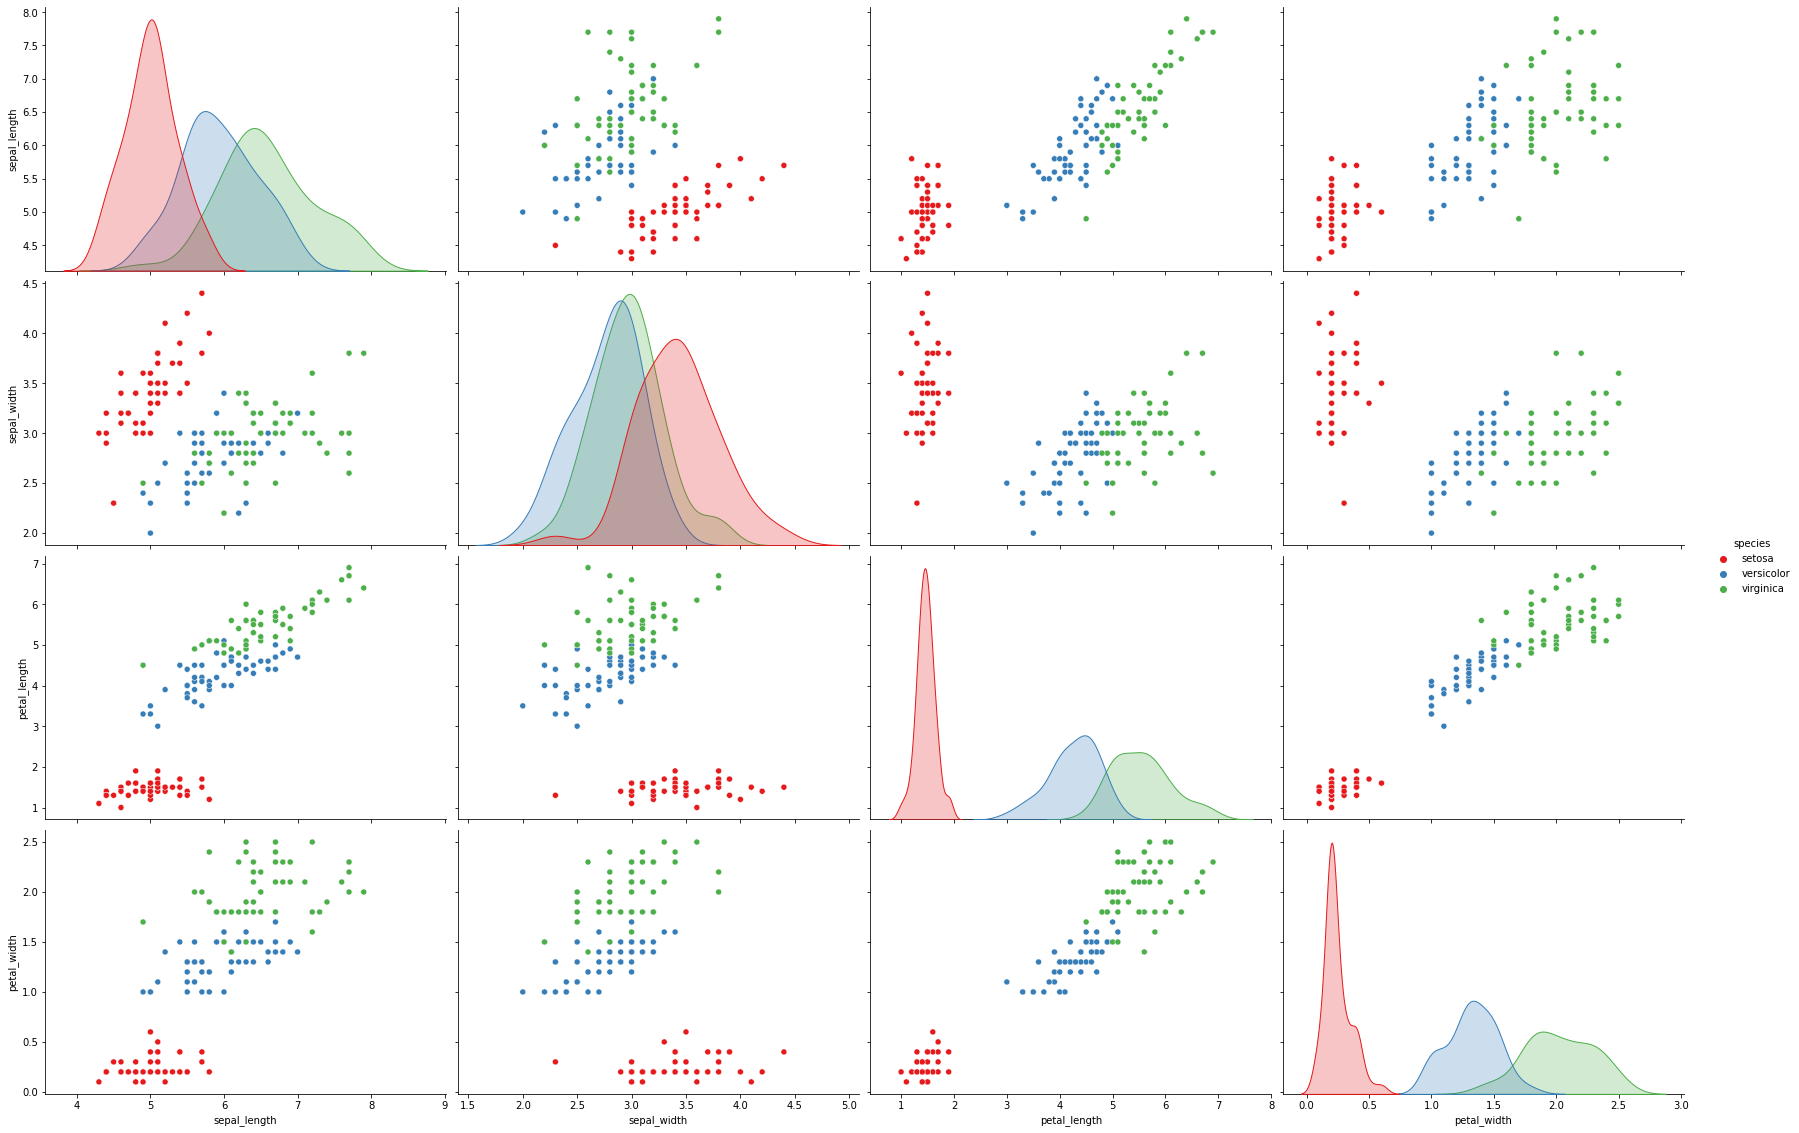

In [10]:
sns.pairplot(df, hue='species', height=4, aspect=1.5)

In [11]:
df['species'] = df['species'].map({'setosa' : 0, 'versicolor' : 1, 'virginica' : 2})
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width  species
133           6.3          2.8           5.1          1.5        2
37            4.9          3.6           1.4          0.1        0
66            5.6          3.0           4.5          1.5        1
27            5.2          3.5           1.5          0.2        0
22            4.6          3.6           1.0          0.2        0

In [12]:
from sklearn.model_selection import train_test_split
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=0)


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
def model_predict(model, train_X, test_X, train_y, test_y):
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    conf_matrix = confusion_matrix(test_y, pred)
    print(classification_report(test_y, pred))
    plot_confusion_matrix(model, test_X, test_y)
    return pred

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



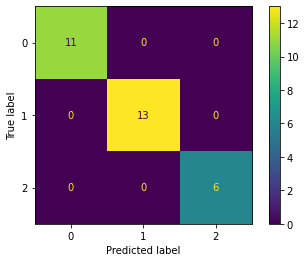

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=150)
pred = model_predict(model, train_X, test_X, train_y, test_y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



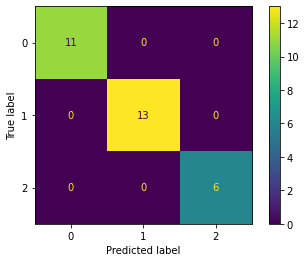

In [39]:
from sklearn.svm import SVC
model = SVC()
pred = model_predict(model, train_X, test_X, train_y, test_y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



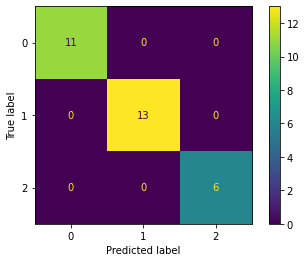

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
pred = model_predict(model, train_X, test_X, train_y, test_y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



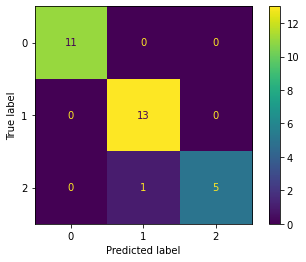

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
pred = model_predict(model, train_X, test_X, train_y, test_y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



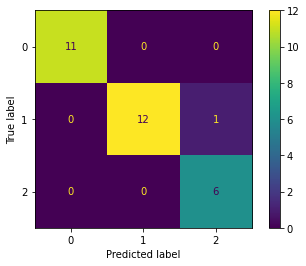

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
pred = model_predict(model, train_X, test_X, train_y, test_y)


In [43]:
final_model = SVC()
final_model.fit(X,y)

SVC()

In [44]:
def prediction(value, model):
  pred = model.predict(value)
  names = []
  for i in pred:
    if i == 0:
      names.append('setosa')
    elif i == 1:
      names.append('versicolor')
    else:
      names.append('virginica')
  return names
values = [[5, 3, 1.5, 0.2],
          [6.2, 3, 4, 1.5],
            [6, 3.5, 5,2]]
a = prediction(values, final_model)
a


['setosa', 'versicolor', 'virginica']

list